# Week 9-1: Unsupervised Machine Learning

## Bibliotheken importeren

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter('ignore')

## Data inlezen en kolommen selecteren

In [11]:
df = pd.read_csv("titanic.csv", sep = ';')
df

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Age,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,3,Braund; Mr. Owen Harris,male,1,0,A/5 21171,7.25,NaN,S,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,1,0,PC 17599,712.833,C85,C,...,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,Heikkinen; Miss. Laina,female,0,0,STON/O2. 3101282,7.925,NaN,S,...,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,1,0,113803,53.1,C123,S,...,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Allen; Mr. William Henry,male,0,0,373450,8.05,NaN,S,...,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,Montvila; Rev. Juozas,male,0,0,211536,13,NaN,S,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,888,1,Graham; Miss. Margaret Edith,female,0,0,112053,30,B42,S,...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,889,3,"Johnston; Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.45,NaN,S,...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,890,1,Behr; Mr. Karl Howell,male,0,0,111369,30,C148,C,...,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.loc[:, ['Pclass', 'Sex', 'Age', 'Survived']]
df

,Pclass,Sex,Age,Survived
0,3,male,22,0
1,1,female,38,1
2,3,female,26,1
3,1,female,35,1
4,3,male,35,0
...,...,...,...,...
886,2,male,27,0
887,1,female,19,1
888,3,female,15,0
889,1,male,26,1


## One-hot encoding van onafhankelijke niet-numerieke variabelen

In [13]:
df['Pclass'] = df['Pclass'].astype(str)
df.dtypes

Pclass      object
Sex         object
Age          int64
Survived     int64
dtype: object

In [14]:
dummies_dataframe = pd.get_dummies(df.loc[:, ['Sex', 'Pclass']])
dummies_dataframe

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,True,False,False
4,False,True,False,False,True
...,...,...,...,...,...
886,False,True,False,True,False
887,True,False,True,False,False
888,True,False,False,False,True
889,False,True,True,False,False


In [15]:
df = pd.concat([df, dummies_dataframe], axis = 1)
df = df.drop(['Sex'], axis = 1)
df = df.loc[:, ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age', 'Survived']]
df

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,Survived
0,False,False,True,False,True,22,0
1,True,False,False,True,False,38,1
2,False,False,True,True,False,26,1
3,True,False,False,True,False,35,1
4,False,False,True,False,True,35,0
...,...,...,...,...,...,...,...
886,False,True,False,False,True,27,0
887,True,False,False,True,False,19,1
888,False,False,True,True,False,15,0
889,True,False,False,False,True,26,1


## Clusteringmodel bouwen met 2 dimensies

In [16]:
df_2d = df.loc[:, ['Age', 'Survived']]
df_2d

,Age,Survived
0,22,0
1,38,1
2,26,1
3,35,1
4,35,0
...,...,...
886,27,0
887,19,1
888,15,0
889,26,1


In [17]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit_predict(df_2d)

array([0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1,

In [18]:
kmeans_centra = pd.DataFrame(kmeans.cluster_centers_)
kmeans_centra

,0,1
0,15.992481,0.379699
1,54.156682,0.354839
2,31.632353,0.401961


In [19]:
for i in range(len(kmeans_centra.columns)):
    kmeans_centra = kmeans_centra.rename(columns = {i : f'{df_2d.columns[i]}'})
    
kmeans_centra

,Age,Survived
0,15.992481,0.379699
1,54.156682,0.354839
2,31.632353,0.401961


In [20]:
for src_index, _ in df_2d.iterrows():
    euclidian_distances = dict()
    print(f"Afstand van bronindex {src_index} tot...")

    for centrumindex, _ in kmeans_centra.iterrows():
        print(f"\tCentrumindex {centrumindex}:")
        euclidian_sum = 0

        for column_name in kmeans_centra.columns:
            current_difference = df_2d.at[src_index, column_name] - kmeans_centra.at[centrumindex, column_name]
            print(f'\t\t{df_2d.at[src_index, column_name]} - {kmeans_centra.at[centrumindex, column_name]} = {current_difference}')
            euclidian_sum += current_difference ** 2
        
        print(f'\tTotale euclidische som: {euclidian_sum}')
        euclidian_distance = math.sqrt(euclidian_sum)
        print(f'\tEuclidische afstand: {euclidian_distance}')
        euclidian_distances[centrumindex] = euclidian_distance
        print('------------------------------------------------')
    
    print(euclidian_distances)
    centrum_number = min(euclidian_distances, key = euclidian_distances.get)
    print(centrum_number)
    df_2d.at[src_index, 'Centrum'] = centrum_number
    print("================================================")

df_2d

Afstand van bronindex 0 tot...
	Centrumindex 0:
		22 - 15.992481203007529 = 6.007518796992471
		0 - 0.3796992481203007 = -0.3796992481203007
	Totale euclidische som: 36.234453615240994
	Euclidische afstand: 6.0195060939616125
------------------------------------------------
	Centrumindex 1:
		22 - 54.156682027649765 = -32.156682027649765
		0 - 0.3548387096774193 = -0.3548387096774193
	Totale euclidische som: 1034.178109537259
	Euclidische afstand: 32.15863973393867
------------------------------------------------
	Centrumindex 2:
		22 - 31.63235294117647 = -9.632352941176471
		0 - 0.4019607843137254 = -0.4019607843137254
	Totale euclidische som: 92.94379565551712
	Euclidische afstand: 9.640736261070371
------------------------------------------------
{0: 6.0195060939616125, 1: 32.15863973393867, 2: 9.640736261070371}
0
Afstand van bronindex 1 tot...
	Centrumindex 0:
		38 - 15.992481203007529 = 22.00751879699247
		1 - 0.3796992481203007 = 0.6203007518796992
	Totale euclidische som: 484.

,Age,Survived,Centrum
0,22,0,0.0
1,38,1,2.0
2,26,1,2.0
3,35,1,2.0
4,35,0,2.0
...,...,...,...
886,27,0,2.0
887,19,1,0.0
888,15,0,0.0
889,26,1,2.0


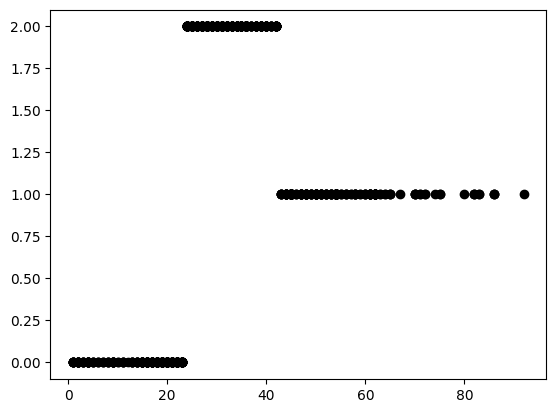

In [21]:
plt.scatter(df_2d['Age'], df_2d['Centrum'], color = 'k')
plt.show()

In [22]:
df_2d.groupby('Centrum', as_index = False)['Centrum'].count()

,Centrum
0,266
1,217
2,408


## Clusteringmodel bouwen met meer dan 2 dimensies (alle kolommen uit de dataset)

### Centra berekenen

In [23]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
prediction_results = kmeans.fit_predict(df)
prediction_results

array([0, 1, 2, 2, 2, 2, 5, 4, 2, 0, 4, 5, 0, 1, 0, 5, 4, 2, 2, 2, 2, 2,
       0, 2, 4, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 4, 0, 1, 2, 5, 2, 0, 2, 4, 4, 0, 1, 1, 4, 1, 1,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 3, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 2, 5, 0, 3, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 3, 2, 0, 4, 0, 3, 2, 2, 5, 4, 2, 0, 2, 1, 2, 0,
       1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 4, 2, 1, 5, 0, 5, 1,
       0, 5, 0, 2, 0, 0, 1, 1, 2, 0, 4, 4, 0, 1, 0, 2, 5, 4, 4, 0, 5, 0,
       0, 5, 2, 2, 0, 0, 4, 4, 4, 0, 0, 1, 1, 2, 2, 0, 0, 4, 1, 5, 0, 1,
       0, 0, 2, 0, 2, 1, 0, 4, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       0, 2, 5, 1, 1, 0, 0, 0, 0, 2, 2, 2, 5, 4, 0, 2, 1, 4, 0, 2, 2, 2,
       2, 0, 2, 1, 0, 0, 2, 5, 2, 2, 5, 2, 1, 2, 2, 2, 2, 5, 2, 4, 5, 1,
       2, 2, 0, 0, 5, 2, 2, 0, 1, 2, 2, 5, 1, 2, 4, 2, 5, 2, 0, 0, 2, 2,
       2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 4, 5, 5, 5,

In [24]:
df['Centrum'] = prediction_results
df

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,Survived,Centrum
0,False,False,True,False,True,22,0,0
1,True,False,False,True,False,38,1,1
2,False,False,True,True,False,26,1,2
3,True,False,False,True,False,35,1,2
4,False,False,True,False,True,35,0,2
...,...,...,...,...,...,...,...,...
886,False,True,False,False,True,27,0,2
887,True,False,False,True,False,19,1,0
888,False,False,True,True,False,15,0,0
889,True,False,False,False,True,26,1,2


### De juiste centra toewijzen aan rijen uit de dataset

In [25]:
df.groupby('Centrum', as_index = False)['Centrum'].count()

,Centrum
0,265
1,145
2,285
3,22
4,61
5,113


## Evalueren